## 1. Loading the modules 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## 2. Loading the data 

In [3]:
train = pd.read_csv("/Users/lukasmetz/Desktop/titanic/train.csv")
test = pd.read_csv("/Users/lukasmetz/Desktop/titanic/test.csv")
gender_submission = pd.read_csv("/Users/lukasmetz/Desktop/titanic/gender_submission.csv")

## 3. Exploring the data (train)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 12 columns and 891 rows
- different datatyps object, int, float

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.1 Looking for the Null-Values

In [8]:
import missingno

<AxesSubplot:>

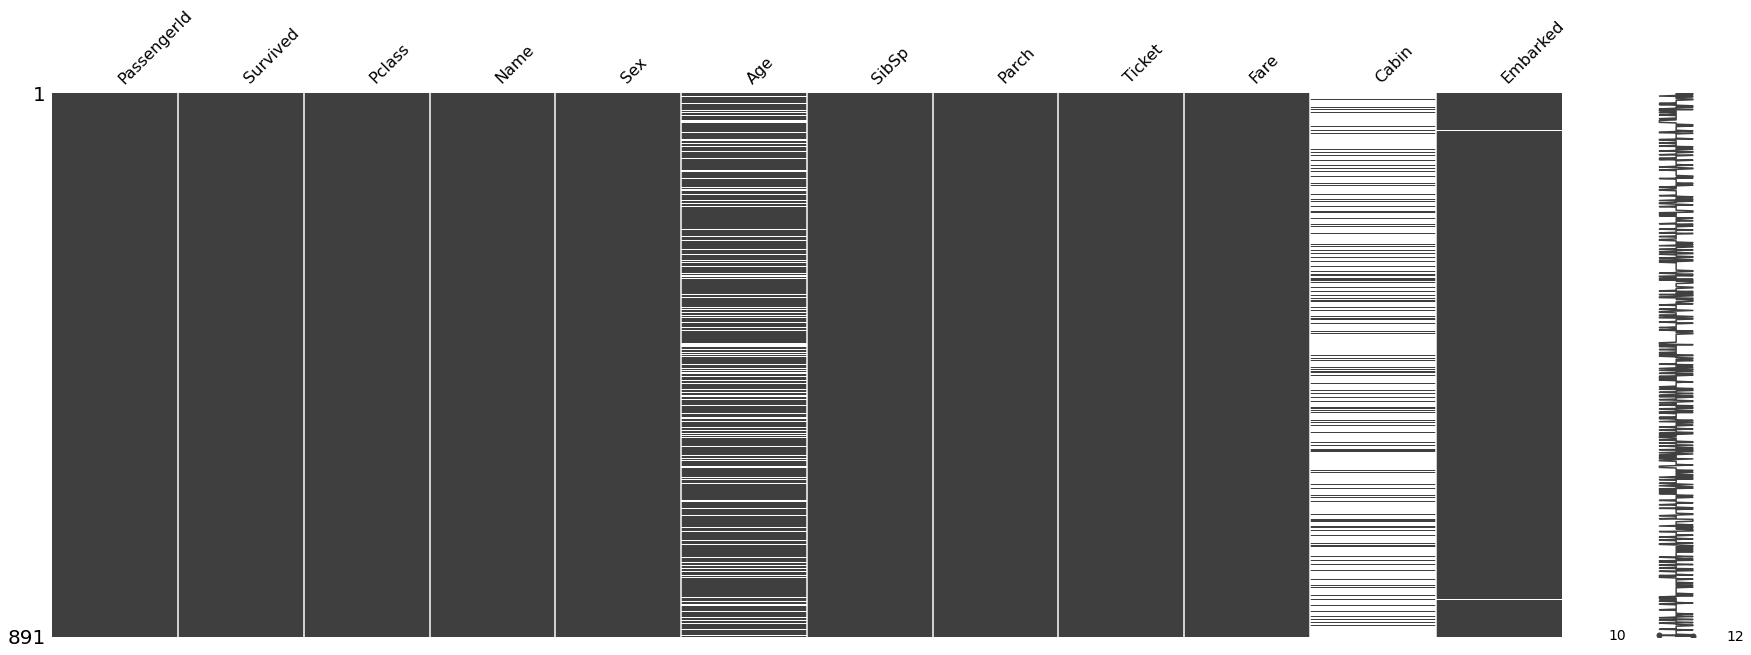

In [27]:
missingno.matrix(train, figsize = (30,10))

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age: 177 NaN Values
- Cabin: 687 NaN Values
- Embarked: 2 NaN Values

## 3.2 Looking at each column and manuipulate or improve it for the Machine Learning Algorithm

create two DataFrames bin (discretised continious variables) and continuous variable

In [11]:
df_bin = pd.DataFrame() # discretised continuous variables
df_con = pd.DataFrame() # continuous variables

In [12]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Looking at the Survived Column 

In [13]:
sur = train.groupby("Survived")[["Name"]].count()
sur

,Name
Survived,
0,549
1,342


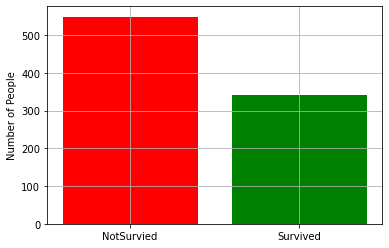

In [14]:
plt.bar(sur.index, sur.Name, color = ["red", "green"])
plt.xticks([0,1], ["NotSurvied", "Survived"])
plt.ylabel("Number of People")
plt.grid()
plt.show()

In [15]:
df_bin['Survived'] = train["Survived"]
df_con["Survived"] = train["Survived"]

### Feature: Pclass

Key: 1 = 1st, 2 = 2nd, 3 = 3th

In [19]:
helper = train.groupby("Pclass")["PassengerId"].count()
helper

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

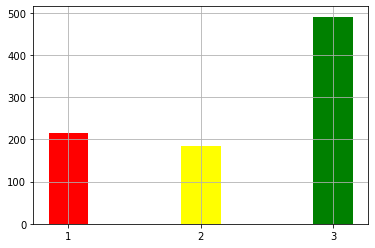

In [25]:
plt.bar(["1", "2", "3"], helper, width = 0.3, color = ["red", "yellow", "green"])
plt.grid()
plt.show()

In [28]:
train.Pclass.isnull().sum()

0

In [29]:
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train["Pclass"]

In [ ]:
can use pd.get_dummies!!!!!!!!!!!!!!!!!

In [30]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Feature: Name

In [31]:
train.Name.value_counts()

Richards, Mrs. Sidney (Emily Hocking)           1
Olsson, Miss. Elina                             1
Tikkanen, Mr. Juho                              1
Andersson, Mr. August Edvard ("Wennerstrom")    1
McKane, Mr. Peter David                         1
                                               ..
Minahan, Miss. Daisy E                          1
Beckwith, Mr. Richard Leonard                   1
O'Leary, Miss. Hanora "Norah"                   1
Watson, Mr. Ennis Hastings                      1
Mallet, Master. Andre                           1
Name: Name, Length: 891, dtype: int64

### Feature: Sex

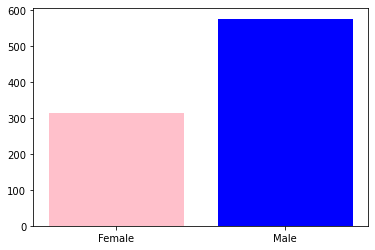

In [34]:
sex_count = train.groupby("Sex")["Pclass"].count()
plt.bar(["Female", "Male"], sex_count, color = ["pink", "blue"])
plt.show()

In [35]:
train.Sex.isnull().sum()

0

- 0 = Male
- 1 = Female

In [36]:
df_bin["Sex"] = train["Sex"]
df_bin["Sex"] = np.where(df_bin["Sex"] == "female", 1, 0)

In [37]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [38]:
df_con["Sex"] = train["Sex"]

In [43]:
f_sur = train[train.Sex == "female"].groupby("Survived")["Pclass"].count()
m_sur = train[train.Sex == "male"].groupby("Survived")["Pclass"].count()

In [44]:
f_sur

Survived
0     81
1    233
Name: Pclass, dtype: int64

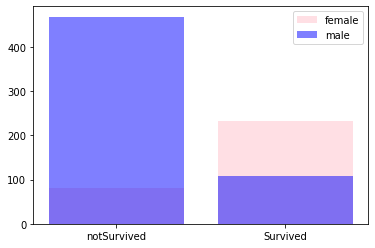

In [48]:
plt.bar(["notSurvived","Survived"], f_sur, color=["pink"], alpha=0.5, label = "female" ) 
plt.bar(["notSurvived","Survived"], m_sur, color=["blue"], alpha=0.5, label = "male")
plt.legend()
plt.show()

- females have a bigger chance to survive
- the most men did not survived -> low chance to survive

### Feature: Age

In [49]:
train.Age.isnull().sum()

177

In [50]:
train.shape

(891, 12)

- lots of missing values
- fill the NaN values with median

In [52]:
mask = train.Age.median()
train.Age = train.Age.fillna(mask)

In [53]:
train.Age.isnull().sum()

0

In [54]:
df_bin["Age"] = train.Age
df_con["Age"] = train.Age

### Feature: SibSp

In [55]:
train.SibSp.isnull().sum()

0

In [56]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [57]:
df_bin["SibSp"] = train.SibSp
df_con["SibSp"] = train.SibSp

### Feature: Parch

In [59]:
train.Parch.isnull().sum()

0

In [60]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [61]:
df_bin["Parch"] = train.Parch
df_con["Parch"] = train.Parch

In [64]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


### Feature: Ticket

In [63]:
train.Ticket.isnull().sum()

0

In [65]:
train.Ticket.value_counts()

1601        7
347082      7
CA. 2343    7
3101295     6
347088      6
           ..
A/5. 851    1
384461      1
8471        1
349252      1
PC 17590    1
Name: Ticket, Length: 681, dtype: int64

- 681 different types of tickets
- group or delete the column
   -> do not add this column

### Feature: Fare

In [66]:
train.Fare.isnull().sum()

0

In [67]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [68]:
df_con["Fare"] = train["Fare"]
df_bin["Fare"] = pd.cut(train["Fare"], bins = 5)

In [69]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [70]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,"(-0.512, 102.466]"
1,1,1,1,38.0,1,0,"(-0.512, 102.466]"
2,1,3,1,26.0,0,0,"(-0.512, 102.466]"
3,1,1,1,35.0,1,0,"(-0.512, 102.466]"
4,0,3,0,35.0,0,0,"(-0.512, 102.466]"


### Feature: Cabine

In [73]:
train.Cabin.isnull().sum()

687

- because of the large missing values we drop it 

### Feature: Embarked

- The port where the passenger boarded the Titanic
- C = Cherbourg, Q = Queenstown, S = Southampton

In [75]:
train.Embarked.isnull().sum()

2

In [76]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

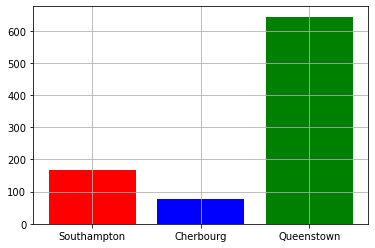

In [79]:
e_helper = train.groupby("Embarked")["Pclass"].count()
plt.bar(["Southampton", "Cherbourg", "Queenstown"], e_helper, color = ["red", "blue", "green"])
plt.grid()
plt.show()

- the two missing values we fill with Q 

In [80]:
df_bin["Embarked"] = train.Embarked
df_con["Embarked"] = train.Embarked

In [81]:
df_bin["Embarked"] = df_bin["Embarked"].fillna("Q")

In [82]:
df_con["Embarked"] = df_con["Embarked"].fillna("Q")

In [83]:
df_con.Embarked.isnull().sum()

0

In [86]:
df_bin.drop("Age", inplace = True, axis=1)

In [87]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [91]:
df_con.drop("Age", inplace = True, axis=1)

In [92]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


## Feature Encoding

In [95]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove("Survived")
df_bin_enc = pd.get_dummies(df_bin, columns = one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [96]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [100]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [101]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,3,male,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,1,1,0,1,0,0
4,0,3,male,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [102]:
# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [103]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


# 4. Start building Machine Learning Moduls

After manipulating and converted to numbers, we can run a series of different machine learning algorithms

In [104]:
selected_df = df_con_enc

In [105]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [106]:
#Split the dataframe into data and labels
X_train = selected_df.drop("Survived", axis = 1) # data
y_train = selected_df.Survived # labels

In [107]:
X_train.shape

(891, 11)

In [108]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [109]:
y_train.shape

(891,)

### Define a function to fit machine learning algorithm

In [117]:
import math, time, random, datetime

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [118]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [119]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.02
Accuracy CV 10-Fold: 79.46
Running Time: 0:00:00.404284


### K-Nearest Neighbours

In [120]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.61
Accuracy CV 10-Fold: 76.88
Running Time: 0:00:00.255730


### Gaussian Naive Bayes 

In [121]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.56
Accuracy CV 10-Fold: 78.0
Running Time: 0:00:00.108341


### Decision Tree Classifier

In [122]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.48
Accuracy CV 10-Fold: 80.36
Running Time: 0:00:00.149427


### Gradient Boost Trees

In [123]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.64
Accuracy CV 10-Fold: 81.14
Running Time: 0:00:01.072436
